# **Methodology - Heatmap, Scatter plot**

In [76]:
# Chuyển đổi cột ngày tháng từ object sang datetime với định dạng ngày/tháng/năm
df['Ngày'] = pd.to_datetime(df['Ngày đăng'], dayfirst=True, errors='coerce')
df = df[['Ngày', 'Kinh độ', 'Vĩ độ']]


# Lọc các hàng có năm là 2023
df_2023 = df[df['Ngày'].dt.year == 2023]
df_2023

,Ngày,Kinh độ,Vĩ độ
0,2023-11-29,10.709727,106.643646
1,2023-11-03,10.814900,106.528946
2,2023-10-24,10.791165,106.564300
3,2023-10-10,10.805709,106.556461
4,2023-08-18,10.663042,106.567246
...,...,...,...
8734,2023-01-13,10.864553,106.633976
8735,2023-01-10,10.856320,106.681293
8736,2023-01-09,10.880142,106.648833
8737,2023-01-03,10.829816,106.623767


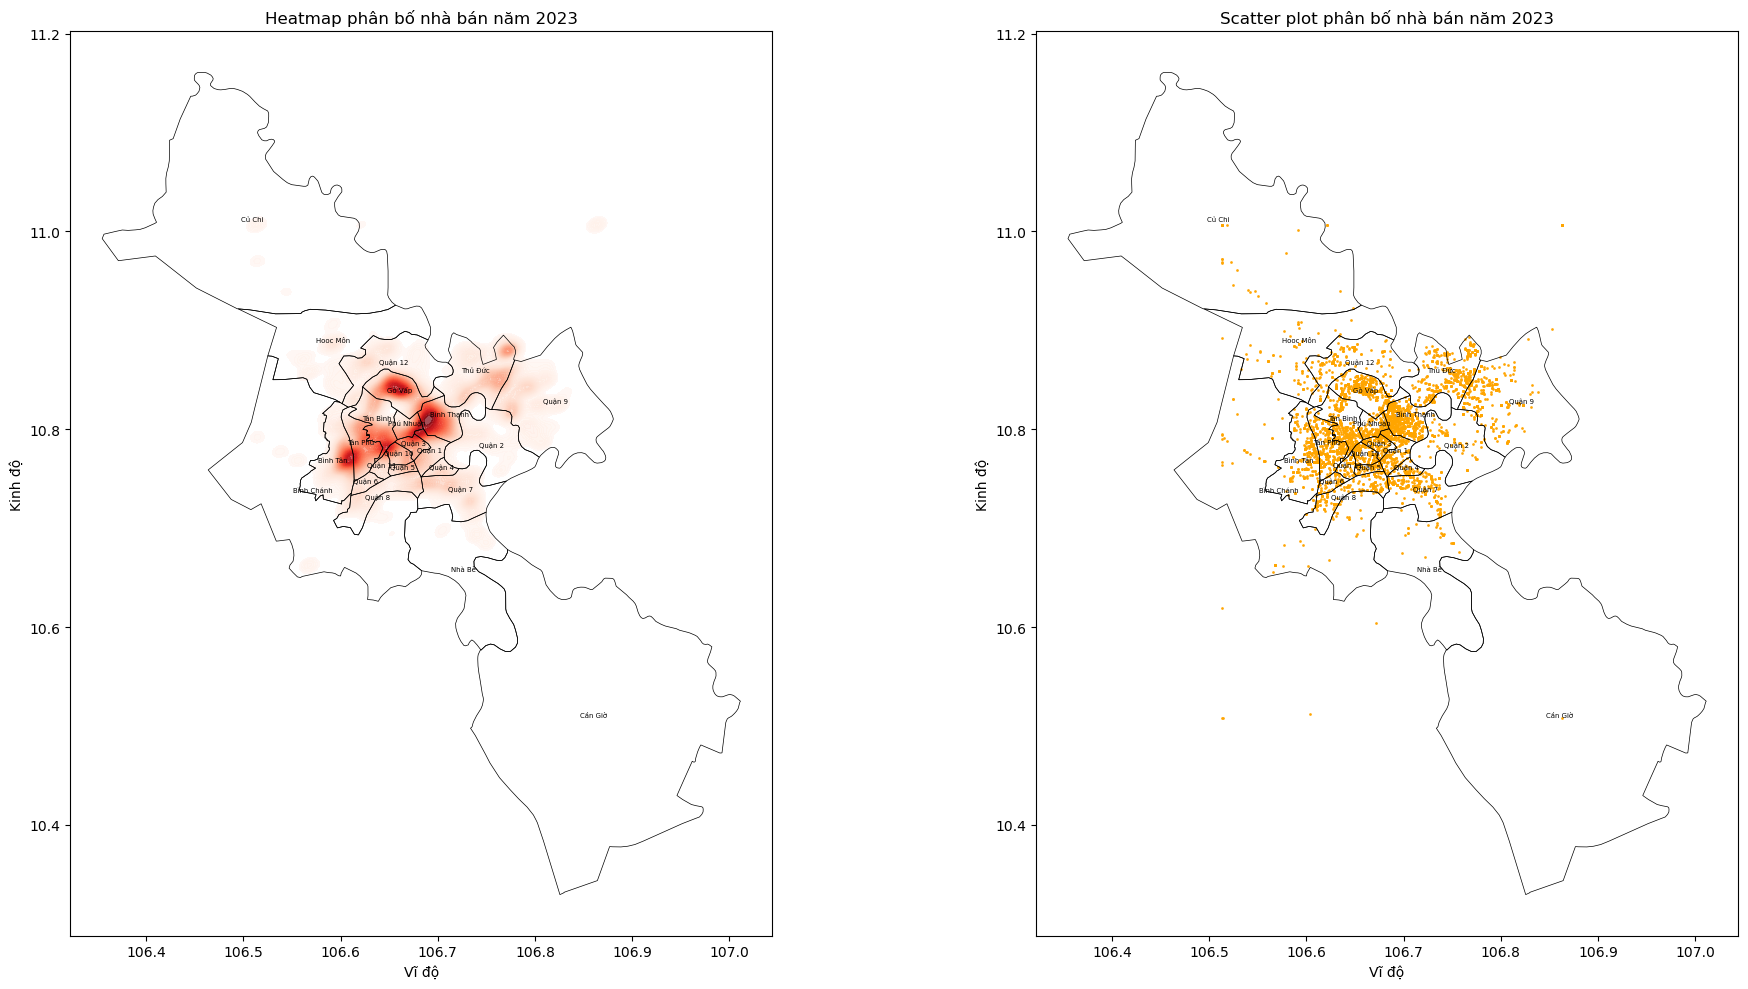

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point



# Đọc tệp GeoJSON vào GeoDataFrame
gdf_districts = gpd.read_file('District zoning.geojson')



# Tạo GeoDataFrame từ DataFrame
geometry = [Point(xy) for xy in zip(df_2023['Kinh độ'], df_2023['Vĩ độ'])]
gdf_hcm = gpd.GeoDataFrame(df_2023, geometry=geometry)
# Vẽ bản đồ với hai subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))



# Subplot bên trái: Vẽ heatmap phân bố nhà bán
sns.kdeplot(
    data=df_2023, x='Vĩ độ', y='Kinh độ',
    cmap='Reds', fill=True, thresh=0.02, ax=ax1, levels=100, bw_adjust=0.5, gridsize=200, alpha=0.7
)
# Vẽ các quận đè lên heatmap bên trái
gdf_districts.boundary.plot(ax=ax1, linewidth=0.5, color='black')
# Dán nhãn tên các quận
for idx, row in gdf_districts.iterrows():
    ax1.annotate(
        text=row["Quan/Huyen"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center', fontsize=5, color='black'
    )
ax1.set_title('Heatmap phân bố nhà bán năm 2023')



# Subplot bên phải: Vẽ scatter plot phân bố nhà bán
ax2.scatter(df_2023['Vĩ độ'], df_2023['Kinh độ'], c='orange', s=1, label='Data Points', alpha=0.9)
# Vẽ các quận đè lên scatter plot bên phải
gdf_districts.boundary.plot(ax=ax2, linewidth=0.5, color='black')
# Dán nhãn tên các quận
for idx, row in gdf_districts.iterrows():
    ax2.annotate(
        text=row["Quan/Huyen"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center', fontsize=5, color='black'
    )
ax2.set_xlabel('Vĩ độ')
ax2.set_ylabel('Kinh độ')
ax2.set_title('Scatter plot phân bố nhà bán năm 2023')



# Hiển thị bản đồ hoàn chỉnh
plt.tight_layout()
plt.show()


In [78]:
# Lọc các hàng có năm là 2022
df_2022 = df[df['Ngày'].dt.year == 2022]
df_2022

,Ngày,Kinh độ,Vĩ độ
54,2022-12-17,10.657945,106.608154
55,2022-12-03,10.665919,106.571563
56,2022-11-24,10.663042,106.567246
57,2022-11-18,10.712971,106.601316
58,2022-11-16,10.650292,106.583421
...,...,...,...
8804,2022-10-28,10.843384,106.630604
8805,2022-10-27,10.877951,106.637654
8806,2022-10-26,10.829289,106.614394
8807,2022-10-26,10.870848,106.628394


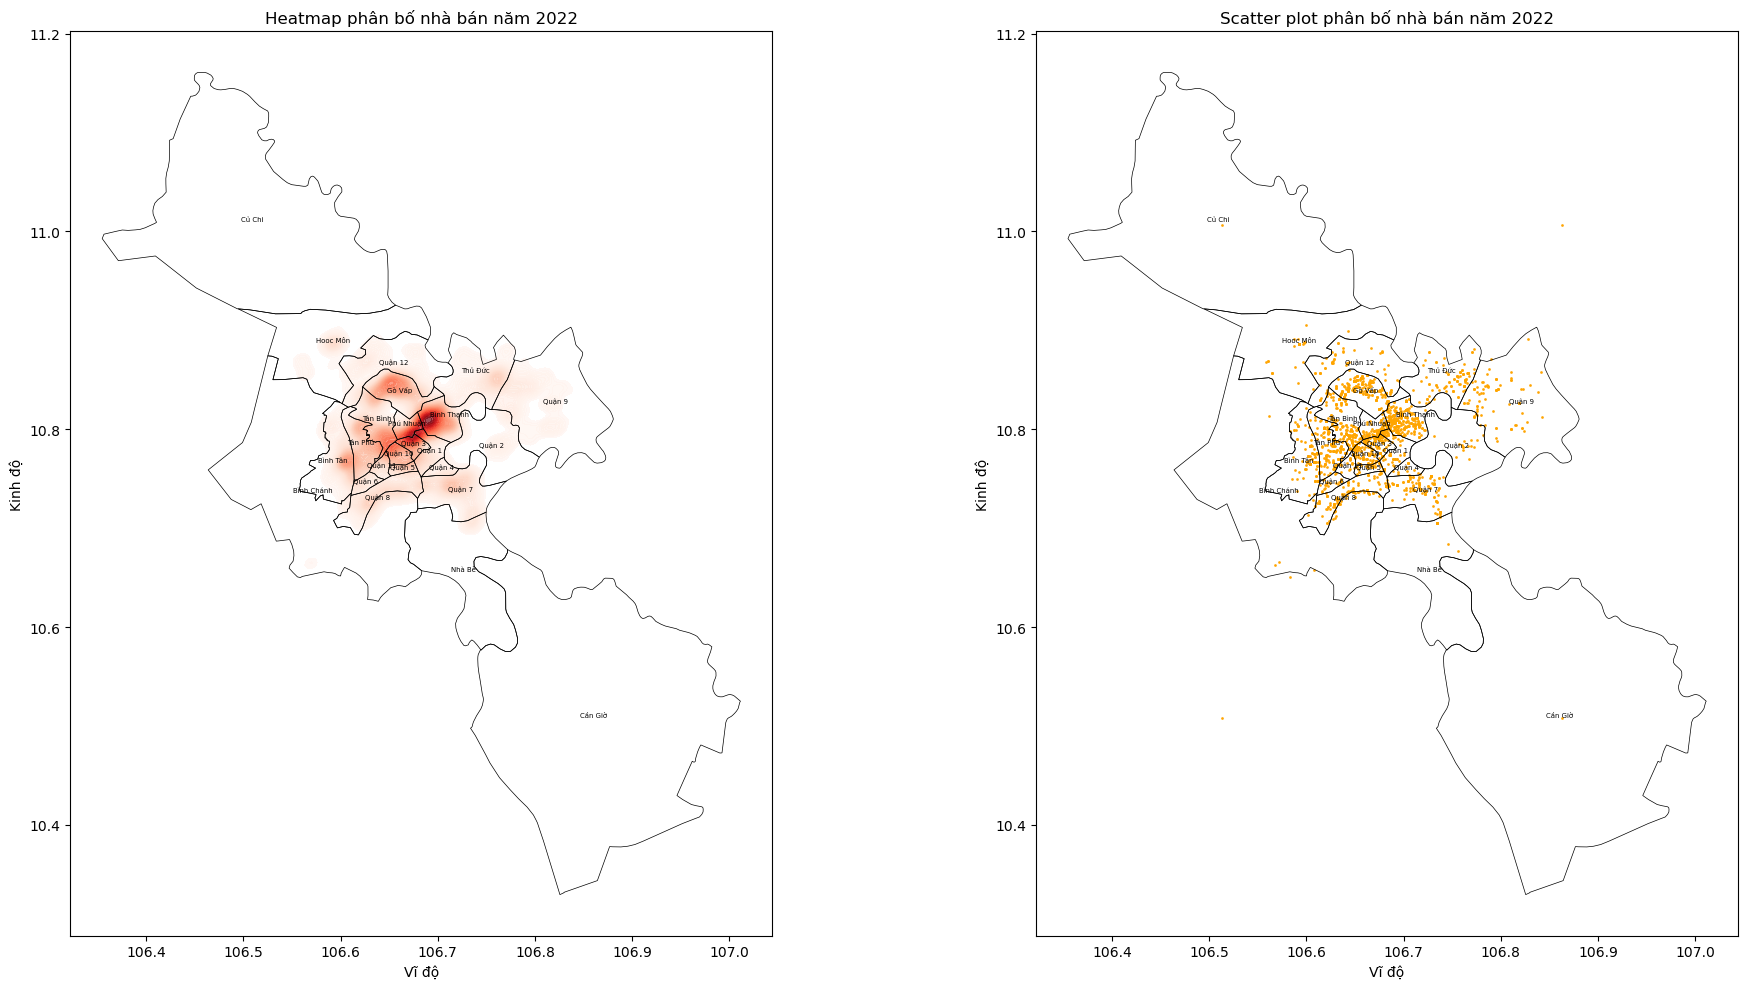

In [79]:
# Tạo GeoDataFrame từ DataFrame
geometry = [Point(xy) for xy in zip(df_2022['Kinh độ'], df_2022['Vĩ độ'])]
gdf_hcm = gpd.GeoDataFrame(df_2022, geometry=geometry)
# Vẽ bản đồ với hai subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))



# Subplot bên trái: Vẽ heatmap phân bố nhà bán
sns.kdeplot(
    data=df_2022, x='Vĩ độ', y='Kinh độ',
    cmap='Reds', fill=True, thresh=0.02, ax=ax1, levels=100, bw_adjust=0.5, gridsize=200, alpha=0.7
)
# Vẽ các quận đè lên heatmap bên trái
gdf_districts.boundary.plot(ax=ax1, linewidth=0.5, color='black')
# Dán nhãn tên các quận
for idx, row in gdf_districts.iterrows():
    ax1.annotate(
        text=row["Quan/Huyen"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center', fontsize=5, color='black'
    )
ax1.set_title('Heatmap phân bố nhà bán năm 2022')



# Subplot bên phải: Vẽ scatter plot phân bố nhà bán
ax2.scatter(df_2022['Vĩ độ'], df_2022['Kinh độ'], c='orange', s=1, label='Data Points', alpha=0.9)
# Vẽ các quận đè lên scatter plot bên phải
gdf_districts.boundary.plot(ax=ax2, linewidth=0.5, color='black')
# Dán nhãn tên các quận
for idx, row in gdf_districts.iterrows():
    ax2.annotate(
        text=row["Quan/Huyen"], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center', fontsize=5, color='black'
    )
ax2.set_xlabel('Vĩ độ')
ax2.set_ylabel('Kinh độ')
ax2.set_title('Scatter plot phân bố nhà bán năm 2022')



# Hiển thị bản đồ hoàn chỉnh
plt.tight_layout()
plt.show()

**Phân tích:**

1. **Có sự tương đồng về phân bố dữ liệu giữa hai năm 2022 và 2023**

2. **Phân bố tổng thể**
   - **Mật độ không đồng đều**: Phân bố mật độ nhà bán tại Tp. Hồ Chí Minh không đồng đều. Các khu vực trung tâm và các khu đô thị mới có mật độ cao, trong khi các khu vực ngoại ô có mật độ thấp hơn.
   - **Mật độ cao**: Các khu vực có màu đỏ đậm là nơi tập trung nhiều ngôi nhà đăng bán. Đây thường là các khu vực phát triển, đô thị hóa cao và có nhiều tiện ích.
   - **Mật độ thấp**: Các khu vực có màu nhạt biểu thị mật độ thấp của các ngôi nhà bán. Thường là những khu vực ít phát triển, ngoại ô hoặc có ít cư dân.
   - **Khu vực đang phát triển**: Các quận lân cận trung tâm như Quận 9, Thủ Đức, Quận 12 có mật độ ngôi nhà bán ở mức trung bình. Đây là các khu vực đang phát triển, gần trung tâm.

3. **So sánh giữa các quận**
   - **Khu vực tập trung cao**: Quận 1, Quận 3, Bình Thạnh, Gò Vấp có màu sắc đậm, cho thấy tỉ lệ bán nhà cao. Đây là các khu vực trung tâm thành phố với nhiều tiện ích, dịch vụ và cơ hội việc làm. Các hoạt động kinh tế, văn hóa và xã hội cũng tập trung ở đây.
   - **Khu vực tập trung thấp**: Các quận ngoại ô như Bình Chánh, Củ Chi, Cần Giờ, Hóc Môn, Nhà Bè gần như không được biểu thị bằng màu, chỉ xuất hiện các điểm nhỏ. Điều này cho thấy mật độ nhà bán thấp và là khu vực cần phát triển hơn. Các khu vực này thường xa trung tâm, ít phát triển hơn và có nhiều đất nông nghiệp.